# Install dependencies

* IMPORTANT: you only need to run this one time, when you first spin up your docker notebook server
* IMPORTANT: you need to restart the kernel after you run this
* TODO: these deps should be eventually put into a dockerfile

* INFO: read more about [what the hell is pip](https://pip.pypa.io/en/stable/) and [why installing dependencies via pip in a notebook is a stupid idea, but OK since we are prototyping here](https://towardsdev.com/pip-install-from-jupyter-notebook-485c218b50b)

In [ ]:
!pip install pandas
!pip install datasets

# Import libraries

also setup the data directory

In [1]:
import os
import re
import glob
import shutil
import string
import pathlib

# set the data directory
data_dir = os.path.abspath(os.path.join(os.getcwd(),'..','data'))

#give matplotlib a folder to save its configs
os.environ['MPLCONFIGDIR'] = os.path.join(data_dir,'plt_configs')
import matplotlib.pyplot as plt

#give huggingface a folder to save its stuff in too
#you only need this if you are using a huggingface dataset
os.environ['HF_HOME'] = os.path.join(data_dir,'hf_cache')
import datasets

import PIL
import PIL.Image

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.layers import TextVectorization

# Download the data, part 1 "control group" faces from huggingface

* [huggingface datasets quickstart](https://huggingface.co/docs/datasets/quickstart)
* [nielsr/CelebA-faces](https://huggingface.co/datasets/nielsr/CelebA-faces)

In [3]:
from datasets import load_dataset

dataset = load_dataset("nielsr/CelebA-faces")

Using custom data configuration nielsr--CelebA-faces-ffaff57f221b8a22
Found cached dataset parquet (/tf/data/hf_cache/datasets/nielsr___parquet/nielsr--CelebA-faces-ffaff57f221b8a22/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

# load the mugshat data from the '/data' folder
* [load and preprocess images](https://www.tensorflow.org/tutorials/load_data/images)

In [4]:
image_count = len(list(pathlib.Path(data_dir).glob('mugshots/*.jpg')))
print(image_count)

9


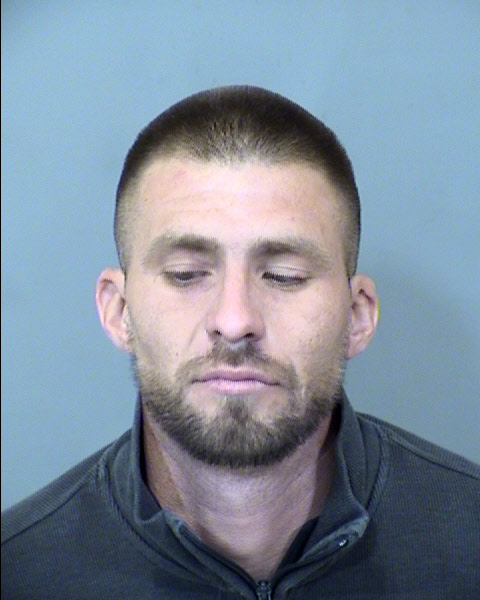

In [5]:
mugshots = list(pathlib.Path(data_dir).glob('mugshots/*.jpg'))
PIL.Image.open(str(mugshots[0]))

# Inspect the data 

* [Know your dataset](https://huggingface.co/docs/datasets/access)

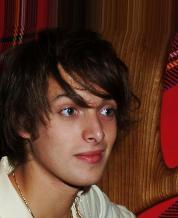

In [8]:
dataset['train'][0]['image']

# Setup Training Set
* [Load a pandas DataFrame](https://www.tensorflow.org/tutorials/load_data/pandas_dataframe)

In [ ]:
# TODO, add code here :)

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  pathlib.Path(data_dir),
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  pathlib.Path(data_dir),
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Load data and train model
* [Image Classification](https://www.tensorflow.org/tutorials/keras/classification)

In [ ]:
# TODO add code here

# Save model and test prediction

In [ ]:
# TODO add code here